# 算法分析

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#一个例子" data-toc-modified-id="一个例子-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>一个例子</a></span></li><li><span><a href="#大O符号" data-toc-modified-id="大O符号-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>大O符号</a></span></li><li><span><a href="#乱序字符串例子" data-toc-modified-id="乱序字符串例子-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>乱序字符串例子</a></span><ul class="toc-item"><li><span><a href="#Method-1：检查" data-toc-modified-id="Method-1：检查-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Method 1：检查</a></span></li><li><span><a href="#Method-2:排序比较" data-toc-modified-id="Method-2:排序比较-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Method 2:排序比较</a></span></li><li><span><a href="#穷举法" data-toc-modified-id="穷举法-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>穷举法</a></span></li><li><span><a href="#计数和比较" data-toc-modified-id="计数和比较-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>计数和比较</a></span></li></ul></li><li><span><a href="#Python基础模块的性能" data-toc-modified-id="Python基础模块的性能-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Python基础模块的性能</a></span><ul class="toc-item"><li><span><a href="#列表[-]" data-toc-modified-id="列表[-]-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>列表<code>[ ]</code></a></span></li><li><span><a href="#字典{-}" data-toc-modified-id="字典{-}-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>字典{ }</a></span></li></ul></li></ul></div>

## 一个例子

> 对简单的 `Python` 程序做基准测试`benchmark`

问题：计算前 n 个整数的和

In [1]:
# version1
def sumOfN(n):
    theSum = 0
    for i in range(1,n+1):
        theSum += i
    return theSum
print sumOfN(10)

55


In [2]:
# version2
def foo(tom):
    fred = 0
    for bill in range(1,tom+1):
        # 增加了不必要的赋值语句
        barney = bill
        fred += barney
    return fred
print foo(10)

55


我们可以通过基准分析`（benchmark analysis）`来测量函数 `SumOfN` 的执行时间，在 `Python` 中，我们可以通过记录相对于系统的开始时间和结束时间来对函数进行基准测试。

在 `time` 模块中有一个 `time` 函数，它可以在任意被调用的地方返回系统时钟的当前时间（以秒为单位）。

In [3]:
# version1
import time

def sumOfN2(n):
    start = time.time()
    theSum = 0
    for i in range(1,n+1):
        theSum += i
    end =time.time()
    return theSum,end-start

In [4]:
for i in range(5):
    print("Sum is %d required %10.7f seconds"%sumOfN2(100000))

Sum is 5000050000 required  0.0139999 seconds
Sum is 5000050000 required  0.0090001 seconds
Sum is 5000050000 required  0.0090001 seconds
Sum is 5000050000 required  0.0079999 seconds
Sum is 5000050000 required  0.0079999 seconds


In [5]:
# version2
def foo2(tom):
    start = time.time()
    fred = 0
    for bill in range(1,tom+1):
        # 增加了不必要的赋值语句
        barney = bill
        fred += barney
    end = time.time()
    return fred,end-start
for i in range(5):
    print("Sum is %d required %10.7f seconds"%foo2(100000))

Sum is 5000050000 required  0.0100000 seconds
Sum is 5000050000 required  0.0119998 seconds
Sum is 5000050000 required  0.0100000 seconds
Sum is 5000050000 required  0.0100000 seconds
Sum is 5000050000 required  0.0090001 seconds


In [6]:
# version3
def sumOfN3(n):
    start =time.time()
    s= (n*(n+1))/2
    end = time.time()
    return s,end-start
for i in range(5):
    print("Sum is %d required %10.7f seconds"%sumOfN3(1000))

Sum is 500500 required  0.0000000 seconds
Sum is 500500 required  0.0000000 seconds
Sum is 500500 required  0.0000000 seconds
Sum is 500500 required  0.0000000 seconds
Sum is 500500 required  0.0000000 seconds


## 大O符号

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

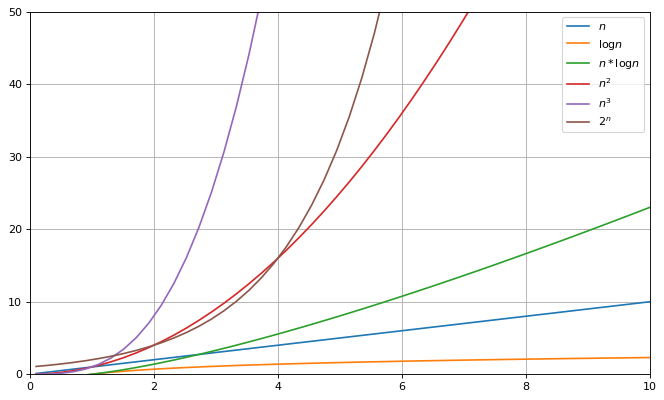

In [8]:
n = np.linspace(0.1, 10)
f = plt.figure(figsize=(10,6), dpi=80)
plt.plot(n,n,label = '$n$')
plt.plot(n,np.log(n),label = '$\logn$')
plt.plot(n,n*np.log(n),label = '$n*\logn$')
plt.plot(n,n**2,label = '$n^2$')
plt.plot(n,n**3,label = '$n^3$')
plt.plot(n,2**n,label = '$2^n$')
p = plt.xlim(0,10)
p = plt.ylim(0,50)
plt.grid(True)
plt.legend()

算法时间复杂度取$f(n)$的最大项，也就是当n趋于无穷大时的最大项，忽略系数，用$O(f(n))$表示

## 乱序字符串例子

* 描述：乱序字符串是指一个字符串只是另一个字符串的重新排列。例如，`'heart'` 和` 'earth' `就是乱序字符串。'python' 和 `'typhon' `也是。为了简单起见，我们假设所讨论的两个字符串具有相等的长度，并且他们由 26 个小写字母集合组成。

* 目标：写一个布尔函数，它将两个字符串做参数并返回它们是不是乱序。

### Method 1：检查

思路：
* 检查第一个字符串是否出现在第二个字符串中，如果可以检测到每一个字符，那么这两个字符串就是乱序.
* Python字符串不可变，先将它变为可变的列表.

In [9]:
def founction1(s1,s2):
    alist = list(s2)
    pos1 = 0
    stillOK = True
    
    while pos1<len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2<len(alist) and not found:
            if s1[pos1]==alist[pos2]:
                found = True
            else:
                pos2 += 1
        if found:
            # 将找到的字符设置为None，避免重复遍历
            alist[pos2]=None
        else:
            stillOK = False
        pos1 += 1
    return stillOK
print founction1('abcd','dcab')

True


算法分析：s1每个字符在s2中最多进行n个字符的迭代，s2列表中的每个位置将被访问一次来匹配来自s1的字符串，即：
![imag](https://github.com/facert/python-data-structure-cn/raw/master/2.%E7%AE%97%E6%B3%95%E5%88%86%E6%9E%90/2.4.%E4%B8%80%E4%B8%AA%E4%B9%B1%E5%BA%8F%E5%AD%97%E7%AC%A6%E4%B8%B2%E6%A3%80%E6%9F%A5%E7%9A%84%E4%BE%8B%E5%AD%90/assets/2.4.1%20%E6%B1%82%E5%92%8C.png)
所以算法时间复杂度为：$O(n^2)$

### Method 2:排序比较

思路：由于我们是要判断两个字符串是不是由完全相同的字符组成，所以我们可以先将他们排序，排序后如果$s1==s2$，那么这两个字符串就是乱序字符串.

In [12]:
def founction2(s1,s2):
    list_1 = list(s1)
    list_2 = list(s2)
    list_1.sort()
    list_2.sort()
    
    match = True
    
    if list_1!=list_2:
        match = False
    return match
#     pos = 0
#     match = True
#     while pos<len(s1) and match:
#         if list_1[pos]==list_2[pos]:
#             pos +=1
#         else:
#             match = False
#     return match
print founction2("abcde","edcba")

True


算法分析：调用`python`的排序函数有时间成本，通常为` O(n^2) 或 O(nlogn)`，所以排序操作比迭代花费更多。最后该算法跟排序过程有同样的量级。

### 穷举法

思路：生成 $s1$ 的所有乱序字符串列表，然后查看是不是有 $s2$，这种序列有$n!$种，$n!$比$n^2$增长更快。

### 计数和比较

思路：利用两个乱序字符串具有相同数目的 a, b, c 等字符的事实，首先计算的是每个字母出现的次数。由于有 26 个可能的字符，我们就用 一个长度为 26 的列表，每个可能的字符占一个位置。每次看到一个特定的字符，就增加该位置的计数器。最后如果两个列表的计数器一样，则字符串为乱序字符串。

In [16]:
def founction(s1,s2):
    c1 = [0]*26
    c2 = [0]*26
    
    for i in range(len(s1)):
        pos = ord(s1[i])-ord('a')
        c1[pos] += 1
        
    for i in range(len(s2)):
        pos = ord(s2[i])-ord('a')
        c2[pos] += 1
    
    j = 0
    stillOK = True
    while j<26 and stillOK:
        if c1[j]==c2[j]:
            j += 1
        else:
            stillOK = False
    return stillOK
print(founction("abcdnf","bcafnd"))

True


算法分析：这个算法它也有迭代，不过不想第一种方法那样有嵌套迭代，它的时间复杂度就为$O(n)$.

## Python基础模块的性能

Python 数据结构性能的最新信息:https://wiki.python.org/moin/TimeComplexity

### 列表`[ ]`

![imag](https://github.com/facert/python-data-structure-cn/raw/61b1080414bf6b4cadb0998dbc2aa6e3bfe96d88/2.%E7%AE%97%E6%B3%95%E5%88%86%E6%9E%90/2.6.%E5%88%97%E8%A1%A8/assets/2.6.%E5%88%97%E8%A1%A8%20Table2.png) 

### 字典{ }

![imag](https://github.com/facert/python-data-structure-cn/raw/61b1080414bf6b4cadb0998dbc2aa6e3bfe96d88/2.%E7%AE%97%E6%B3%95%E5%88%86%E6%9E%90/2.7.%E5%AD%97%E5%85%B8/assets/2.7.%E5%AD%97%E5%85%B8.table3.png)